# Have ICU rates per new Covid cases changed over time? Let's find out...
<br>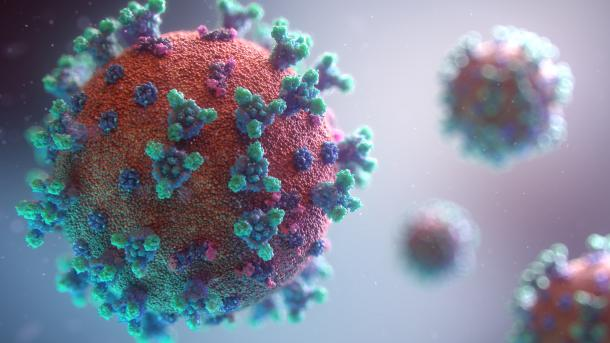<br>

In [1]:
#Import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Create dataframe from URL
df = pd.read_csv(r"https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv")
df

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.403
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.517
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
...,...,...,...,...,...
159947,United States,USA,2022-09-23,Daily ICU occupancy per million,9.101
159948,United States,USA,2022-09-23,Daily hospital occupancy,24431.000
159949,United States,USA,2022-09-23,Daily hospital occupancy per million,72.496
159950,United States,USA,2022-09-23,Weekly new hospital admissions,28270.000


In [3]:
#Isolate only US data and check column data types
df_usa = df.loc[df['entity'] == "United States"]
df_usa.dtypes

entity        object
iso_code      object
date          object
indicator     object
value        float64
dtype: object

In [4]:
#Print data frame only US data
df_usa

,entity,iso_code,date,indicator,value
155158,United States,USA,2020-07-15,Daily ICU occupancy,9245.000
155159,United States,USA,2020-07-15,Daily ICU occupancy per million,27.433
155160,United States,USA,2020-07-15,Daily hospital occupancy,33760.000
155161,United States,USA,2020-07-15,Daily hospital occupancy per million,100.179
155162,United States,USA,2020-07-16,Daily ICU occupancy,9797.000
...,...,...,...,...,...
159947,United States,USA,2022-09-23,Daily ICU occupancy per million,9.101
159948,United States,USA,2022-09-23,Daily hospital occupancy,24431.000
159949,United States,USA,2022-09-23,Daily hospital occupancy per million,72.496
159950,United States,USA,2022-09-23,Weekly new hospital admissions,28270.000


In [32]:
df_usa_new = pd.DataFrame(columns=['date', 'indicator', 'value'])
df_usa_new['date'] = df_usa['date']
df_usa_new['indicator'] = df_usa['indicator']
df_usa_new['value'] = df_usa['value']
df_usa_new = df_usa_new.loc[df_usa_new['indicator'] == "Daily ICU occupancy"]
df_usa_new

,date,indicator,value
155158,2020-07-15,Daily ICU occupancy,9245.0
155162,2020-07-16,Daily ICU occupancy,9797.0
155166,2020-07-17,Daily ICU occupancy,10700.0
155170,2020-07-18,Daily ICU occupancy,10963.0
155174,2020-07-19,Daily ICU occupancy,10267.0
...,...,...,...
159922,2022-09-19,Daily ICU occupancy,3289.0
159928,2022-09-20,Daily ICU occupancy,3291.0
159934,2022-09-21,Daily ICU occupancy,3250.0
159940,2022-09-22,Daily ICU occupancy,3177.0


In [5]:
#Convert date to datetime object and print dtypes to verify
df_usa['date'] = pd.to_datetime(df_usa['date'])
df_usa.dtypes

/var/folders/r5/dqdjtbjj6nq3rz6gv7ksydkm0000gn/T/ipykernel_1107/1417433304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['date'] = pd.to_datetime(df_usa['date'])


entity               object
iso_code             object
date         datetime64[ns]
indicator            object
value               float64
dtype: object

In [6]:
#Previous df had multiple indicators..we need to create a dataframe with only date and daily ICU Occupancy
df_usa_wide = df_usa.pivot("date", "indicator")
df_usa_wide.head(10)

entity                                  \
indicator  Daily ICU occupancy Daily ICU occupancy per million   
date                                                             
2020-07-15       United States                   United States   
2020-07-16       United States                   United States   
2020-07-17       United States                   United States   
2020-07-18       United States                   United States   
2020-07-19       United States                   United States   
2020-07-20       United States                   United States   
2020-07-21       United States                   United States   
2020-07-22       United States                   United States   
2020-07-23       United States                   United States   
2020-07-24       United States                   United States   

                                                                          \
indicator  Daily hospital occupancy Daily hospital occupancy per million   
date                                                                       
2020-07-15            United States                        United States   
2020-07-16            United States                        United States   
2020-07-17            United States                        United States   
2020-07-18            United States                        United States   
2020-07-19            United States                        United States   
2020-07-20            United States                        United States   
2020-07-21            United States                        United States   
2020-07-22            United States                        United States   
2020-07-23            United States                        United States   
2020-07-24            United States                        United States   

                                           \
indicator  Weekly new hospital admissions   
date                                        
2020-07-15                            NaN   
2020-07-16                            NaN   
2020-07-17                            NaN   
2020-07-18                            NaN   
2020-07-19                            NaN   
2020-07-20                            NaN   
2020-07-21                  United States   
2020-07-22                  United States   
2020-07-23                  United States   
2020-07-24                  United States   

                                                                 iso_code  \
indicator  Weekly new hospital admissions per million Daily ICU occupancy   
date                                                                        
2020-07-15                                        NaN                 USA   
2020-07-16                                        NaN                 USA   
2020-07-17                                        NaN                 USA   
2020-07-18                                        NaN                 USA   
2020-07-19                                        NaN                 USA   
2020-07-20                                        NaN                 USA   
2020-07-21                              United States                 USA   
2020-07-22                              United States                 USA   
2020-07-23                              United States                 USA   
2020-07-24                              United States                 USA   

                                                                     \
indicator  Daily ICU occupancy per million Daily hospital occupancy   
date                                                                  
2020-07-15                             USA                      USA   
2020-07-16                             USA                      USA   
2020-07-17                             USA                      USA   
2020-07-18                             USA                      USA   
2020-07-19                             USA                      USA   
2020-07-20          

In [10]:
df_occ = df_usa_wide['value']['Daily ICU occupancy']
df_occ

date
2020-07-15     9245.0
2020-07-16     9797.0
2020-07-17    10700.0
2020-07-18    10963.0
2020-07-19    10267.0
               ...   
2022-09-19     3289.0
2022-09-20     3291.0
2022-09-21     3250.0
2022-09-22     3177.0
2022-09-23     3067.0
Name: Daily ICU occupancy, Length: 801, dtype: float64

In [ ]:
df_occ.index

<AxesSubplot:xlabel='date', ylabel='Daily ICU occupancy'>

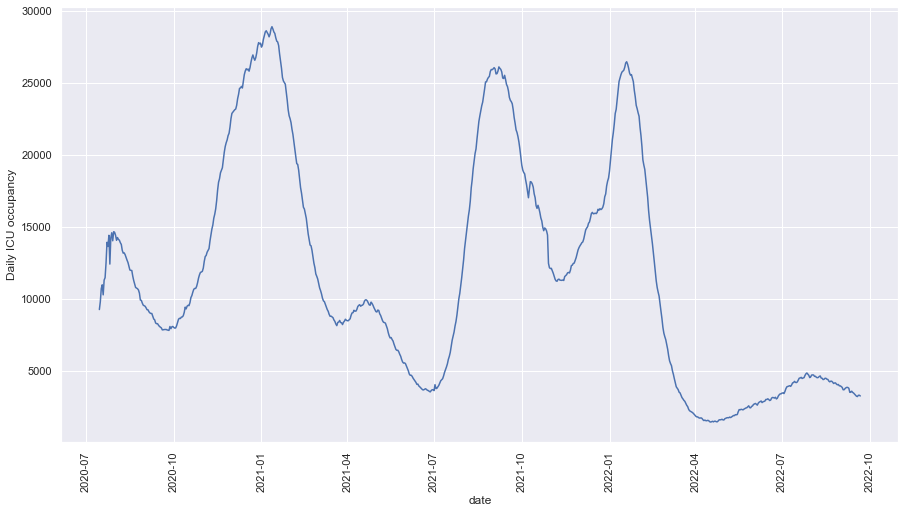

In [77]:
#Plot chart 'Daily ICU Occupancy'
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(rotation=90)
plot = sns.lineplot(data=df_occ)
plot

In [38]:
#Now lets find daily new cases. We start by creating a dataframe from a new URL with daily case data
df_cases = pd.read_csv(r"https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [39]:
#Isolate only US data and print data types
df_cases_usa = df_cases.loc[df_cases['location'] == "United States"]
df_cases_usa.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [40]:
#We will need to convert the date column to a datetime object and print to verify conversion
df_cases_usa['date'] = pd.to_datetime(df_cases_usa['date'])
df_cases_usa.dtypes

/var/folders/r5/dqdjtbjj6nq3rz6gv7ksydkm0000gn/T/ipykernel_1107/2896993867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases_usa['date'] = pd.to_datetime(df_cases_usa['date'])


iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [41]:
#Dates from the previous data frame with ICU data do not match case data df. We will need to line these up by
#filtering only dates from cases that align with the dates from ICU data.
df_cases_usa = df_cases_usa[df_cases_usa['date'] >= '2020-07-15']
df_cases_usa.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
206564,USA,North America,United States,2020-07-15,3507884.0,66393.0,63029.857,137910.0,963.0,767.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206565,USA,North America,United States,2020-07-16,3578699.0,70815.0,64600.143,138883.0,973.0,758.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206566,USA,North America,United States,2020-07-17,3645043.0,66344.0,64253.429,139804.0,921.0,774.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206567,USA,North America,United States,2020-07-18,3709336.0,64293.0,64797.143,140693.0,889.0,794.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206568,USA,North America,United States,2020-07-19,3768320.0,58984.0,64615.571,141176.0,483.0,795.571,...,19.1,24.6,NaN,2.77,78.86,0.926,170421.8,10.35,20.4,505.706236


In [42]:
df_cases_usa['new_cases'] = df_cases_usa['new_cases'].div(10).round(0)
df_cases_usa.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
206564,USA,North America,United States,2020-07-15,3507884.0,6639.0,63029.857,137910.0,963.0,767.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206565,USA,North America,United States,2020-07-16,3578699.0,7082.0,64600.143,138883.0,973.0,758.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206566,USA,North America,United States,2020-07-17,3645043.0,6634.0,64253.429,139804.0,921.0,774.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206567,USA,North America,United States,2020-07-18,3709336.0,6429.0,64797.143,140693.0,889.0,794.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206568,USA,North America,United States,2020-07-19,3768320.0,5898.0,64615.571,141176.0,483.0,795.571,...,19.1,24.6,NaN,2.77,78.86,0.926,170421.8,10.35,20.4,505.706236


In [43]:
df_cases_usa['new_cases_smoothed'] = df_cases_usa['new_cases_smoothed'].div(10).round(0)
df_cases_usa.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
206564,USA,North America,United States,2020-07-15,3507884.0,6639.0,6303.0,137910.0,963.0,767.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206565,USA,North America,United States,2020-07-16,3578699.0,7082.0,6460.0,138883.0,973.0,758.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206566,USA,North America,United States,2020-07-17,3645043.0,6634.0,6425.0,139804.0,921.0,774.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206567,USA,North America,United States,2020-07-18,3709336.0,6429.0,6480.0,140693.0,889.0,794.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
206568,USA,North America,United States,2020-07-19,3768320.0,5898.0,6462.0,141176.0,483.0,795.571,...,19.1,24.6,NaN,2.77,78.86,0.926,170421.8,10.35,20.4,505.706236


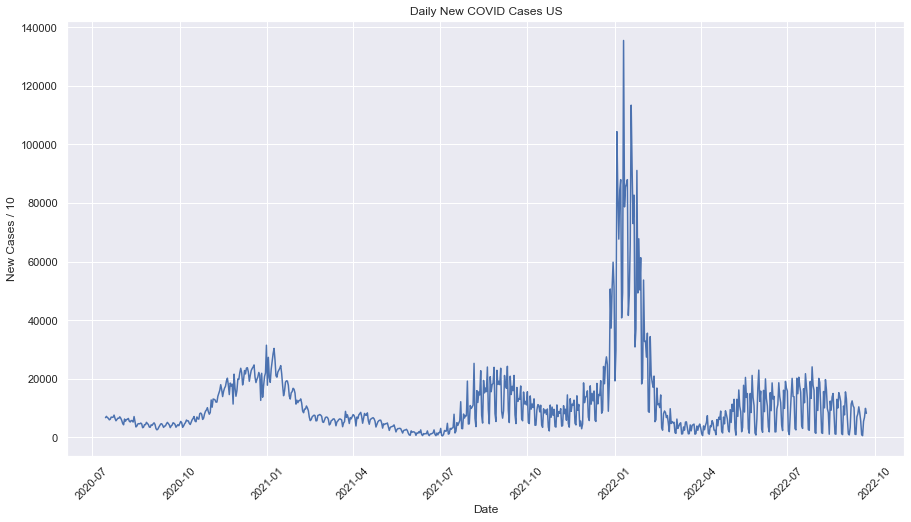

In [115]:
#Plot new cases with Matplotlib
plt.plot(df_cases_usa['date'], df_cases_usa['new_cases'])
plt.xticks(rotation=45)
plt.xlabel("Date")  # add X-axis label
plt.ylabel("New Cases / 10")  # add Y-axis label
plt.title("Daily New COVID Cases US")  # add title
plt.show()

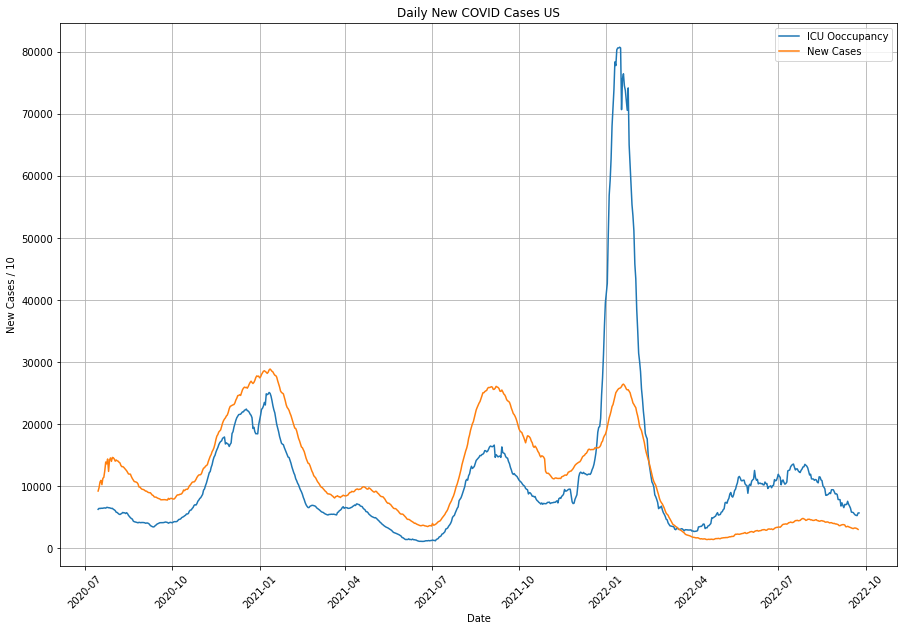

In [57]:
#Same chart as previous cell with data smoothed out with ICU overlay (much better 😀)
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)
plt.plot(df_cases_usa['date'], df_cases_usa['new_cases_smoothed'], label="ICU Ooccupancy")
plt.plot(df_usa_new['date'], df_usa_new['value'], label="New Cases")
plt.xticks(rotation=45)
plt.xlabel("Date")  # add X-axis label
plt.ylabel("New Cases / 10")  # add Y-axis label
plt.title("Daily New COVID Cases US")  # add title
plt.grid()
plt.legend()
plt.show()

According to the last two peaks (2021-01 and 2022-07), it appears the relationship of New Cases to ICU Admissions has decreased significantly. PLEAEE NOTE: there are many additional factors that can impact my conclusion outside of the data inluded here.